In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/sample_data/SALTMODELS_k.zip','r') #Opens the zip file
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2 as cv
from torch.utils.data import DataLoader

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve

In [ ]:
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

In [ ]:
import os
import pandas as pd

In [ ]:
data_dir = "/tmp/SALTMODELS_k"
# Define the file paths for the Excel files
try:
    salt_train_df = salt_df = pd.read_excel('/tmp/SALTMODELS_k/TRAIN_SALT_DL.xlsx', sheet_name='Fertility')  # Update this with the actual path to your file
    salt_test_df = pd.read_excel('/tmp/SALT_MODELS/TEST_SALT_DL.xlsx', sheet_name='Sheet1')  # Update this with the actual path to your file
except Exception as e:
    print("Error loading Excel files:", e)


In [ ]:
salt_train_df = salt_train_df.drop(salt_train_df.index[0]).iloc[:, 1:]
salt_test_df = salt_test_df.drop(salt_test_df.index[0]).iloc[:, 1:]


In [ ]:
# Check if the DataFrames are processed correctly
print("Salt train DataFrame head:\n", salt_train_df.head())
print("Salt test DataFrame head:\n", salt_test_df.head())

Salt train DataFrame head:
    CHTST7-4  CHTST7-3  CHTST7-2  CHTST7-1  CHTST6-4  CHTST6-3  CHTST6-2  \
1     302.3     264.5     196.8     311.7     245.8     290.8     398.3   
2     277.9     247.8     208.4     291.0     285.3     288.9     502.9   
3     243.0     196.1     131.5     220.0     251.5     240.5     304.7   
4     585.7    1547.0    1769.5    1840.9    1837.0     322.0     540.0   
5    1865.5    4054.6    3834.3    4117.3    4203.3    1161.3    1554.9   

   CHTST5-4  CHTST5-3  CHTST5-2  ...  CHTST3-3  CHTST3-2  CHTST3-1  CHTST2-3  \
1     292.2     445.8     148.3  ...     195.1     205.1     299.3     227.7   
2     280.4     484.3     181.3  ...     251.6     225.3     279.0     270.3   
3     210.9     368.7     153.3  ...     206.1     201.3     238.4     242.0   
4     330.5     443.2     134.3  ...     207.0     868.4     241.3     238.0   
5     943.6     952.4     162.9  ...     291.1     902.4     228.2     200.1   

   CHTST2-2  CHTST2-1  CHTST1-4  CHTST1-

In [ ]:
y = np.where(salt_train_df.iloc[:, 0] > 470, 1, 0)
# Convert labels to categorical (one-hot encoding)

# Your features matrix X remains the same
X = np.array(salt_train_df.iloc[:, 1:])

In [ ]:
print(X)

[[ 264.5  196.8  311.7 ...  213.4  339.6  329.7]
 [ 247.8  208.4  291.  ...  196.8  354.1  377.9]
 [ 196.1  131.5  220.  ...  151.7  196.   257. ]
 ...
 [2339.1  705.3 1046.6 ...  263.7  473.1  256. ]
 [2080.9  661.   998.8 ...  165.4  275.8  238.4]
 [1952.1  695.1 1006.3 ...  180.9  197.2  210.3]]


In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
print(X)

[[[ 264.5]
  [ 196.8]
  [ 311.7]
  ...
  [ 213.4]
  [ 339.6]
  [ 329.7]]

 [[ 247.8]
  [ 208.4]
  [ 291. ]
  ...
  [ 196.8]
  [ 354.1]
  [ 377.9]]

 [[ 196.1]
  [ 131.5]
  [ 220. ]
  ...
  [ 151.7]
  [ 196. ]
  [ 257. ]]

 ...

 [[2339.1]
  [ 705.3]
  [1046.6]
  ...
  [ 263.7]
  [ 473.1]
  [ 256. ]]

 [[2080.9]
  [ 661. ]
  [ 998.8]
  ...
  [ 165.4]
  [ 275.8]
  [ 238.4]]

 [[1952.1]
  [ 695.1]
  [1006.3]
  ...
  [ 180.9]
  [ 197.2]
  [ 210.3]]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.36, stratify=y, random_state=47)

In [ ]:
print("Validation set size:", len(X_val))

Validation set size: 17


In [ ]:
print("Validation set size:", len(X_train))

Validation set size: 28


In [ ]:
# # Define the custom loss function
# def custom_loss(y_true, y_pred):
#     # Convert y_pred to binary categories based on the threshold
#     y_pred_binary = tf.where(y_pred < 650, 0, 1)
#     # Use binary cross-entropy loss
#     return tf.keras.losses.binary_crossentropy(y_true, y_pred_binary)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define the LSTM model with two LSTM layers and a dropout layer
modelu = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the model
modelu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = modelu.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.8566 - accuracy: 0.3571 - val_loss: 0.7171 - val_accuracy: 0.2941
Epoch 2/50
1/1 [==============================] - 0s 66ms/step - loss: 0.7877 - accuracy: 0.5714 - val_loss: 0.6801 - val_accuracy: 0.9412
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 0.7013 - accuracy: 0.6071 - val_loss: 0.6434 - val_accuracy: 0.9412
Epoch 4/50
1/1 [==============================] - 0s 64ms/step - loss: 0.7178 - accuracy: 0.4643 - val_loss: 0.6086 - val_accuracy: 0.9412
Epoch 5/50
1/1 [==============================] - 0s 63ms/step - loss: 0.5798 - accuracy: 0.7857 - val_loss: 0.5774 - val_accuracy: 0.9412
Epoch 6/50
1/1 [==============================] - 0s 61ms/step - loss: 0.6021 - accuracy: 0.7500 - val_loss: 0.5513 - val_accuracy: 0.9412
Epoch 7/50
1/1 [==============================] - 0s 65ms/step - loss: 0.5480 - accuracy: 0.8214 - val_loss: 0.5301 - val_accuracy: 0.9412
Epoch 8/50
1/1 [=============

# New Section

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Make predictions on the test set
y_pred_salt = modelu.predict(X_val)
y_pred_salt_binary = (y_pred_salt > 0.5).astype(int)  # Convert probabilities to binary predictions

1/1 [==============================] - 0s 466ms/step


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred_salt_binary)

In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred_salt_binary))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


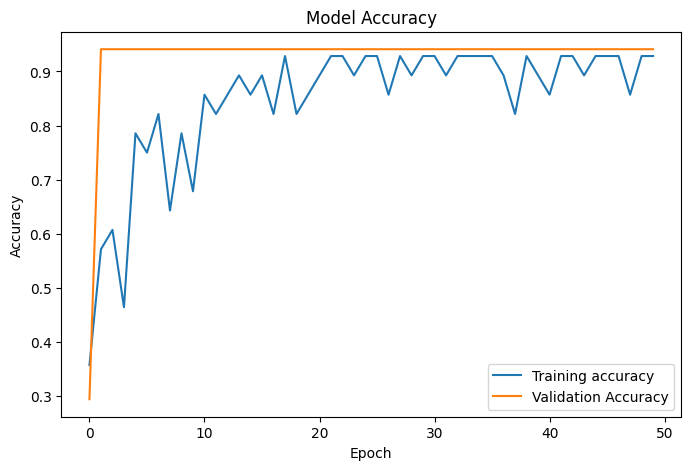

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

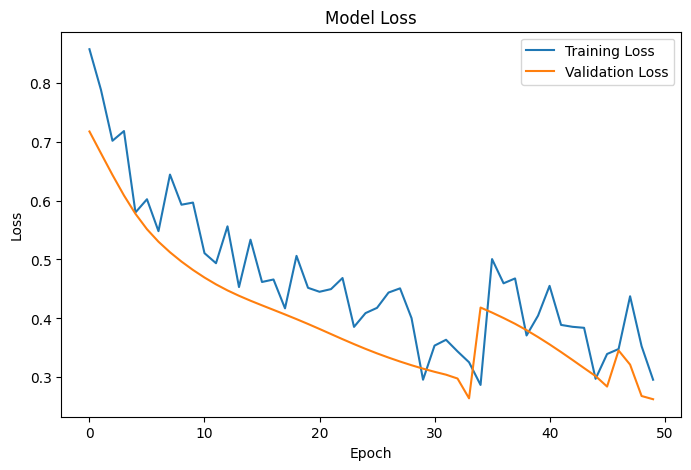

In [ ]:
# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# def preprocess_data(df):
#     # Convert fertility values to categories: 0 for good (< 690), 1 for bad (>= 690)
#     # Ensure that labels are a 1D array with one label per sample
#     labels = (df.mean(axis=1) >= 477).astype(int)
#     # Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data_normalized = scaler.fit_transform(df)
#     # Reshape the data to fit the LSTM input format (samples, timesteps, features)
#     data_normalized = data_normalized.reshape((data_normalized.shape[0], data_normalized.shape[1], 1))
#     return data_normalized, labels

In [ ]:
# salt_data, salt_labels = preprocess_data(salt_df)
# acetic_acid_data, acetic_acid_labels = preprocess_data(acetic_acid_df)

In [ ]:
# # Split the data into training, validation, and testing sets
# X_train_salt, X_test_salt, y_train_salt, y_test_salt = train_test_split(salt_data, salt_labels, test_size=0.3, random_state=42)
# X_train_acetic_acid, X_test_acetic_acid, y_train_acetic_acid, y_test_acetic_acid = train_test_split(acetic_acid_data, acetic_acid_labels, test_size=0.3, random_state=42)

In [ ]:
# # Check if the DataFrames are processed correctly
# print("Salt Ttest head:\n", X_test_salt.head())
# print("Salt Ytest head:\n", acetic_acid_df.head())

In [ ]:
# # Compile the model
# model_saltly.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_acetic_acid = Sequential()
model_acetic_acid.add(LSTM(units=64, input_shape=(X_train_acetic_acid.shape[1], 1), return_sequences=True))  # Increase LSTM units
model_acetic_acid.add(Dropout(0.1))  # Add dropout for regularization
model_acetic_acid.add(LSTM(units=32))
model_acetic_acid.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_salt.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the acetic acid dataset
history_acetic_acid = model.fit(
    X_train_acetic_acid,
    y_train_acetic_acid,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_acetic_acid, y_test_acetic_acid)
)

Epoch 1/100
1/1 [==============================] - 0s 187ms/step - loss: 1.9345 - accuracy: 0.0667 - val_loss: 1.9093 - val_accuracy: 0.0714
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 1.8675 - accuracy: 0.0667 - val_loss: 1.7827 - val_accuracy: 0.0714
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 1.7098 - accuracy: 0.0667 - val_loss: 1.5723 - val_accuracy: 0.0714
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 1.4797 - accuracy: 0.0667 - val_loss: 1.3332 - val_accuracy: 0.0714
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 1.2476 - accuracy: 0.0667 - val_loss: 1.1546 - val_accuracy: 0.0714
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 1.0805 - accuracy: 0.0667 - val_loss: 1.0494 - val_accuracy: 0.0714
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.9859 - accuracy: 0.0667 - val_loss: 0.9862 - val_accuracy: 0.0714
Epoch 8/100
1/1 [==

In [ ]:
# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Make predictions on the test set
y_pred_acetic_acid = model_acetic_acid.predict(X_test_acetic_acid)
y_pred_acetic_acid_binary = (y_pred_acetic_acid > 0.5).astype(int)  # Convert probabilities to binary predictions

1/1 [==============================] - 0s 18ms/step


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test_acetic_acid, y_pred_acetic_acid_binary)

In [ ]:
# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9285714285714286
Precision: 0.07142857142857142
Recall: 1.0
F1-score: 0.13333333333333333


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test_acetic_acid, y_pred_acetic_acid_binary))



Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.00      0.00      0.00         1

    accuracy                           0.93        14
   macro avg       0.46      0.50      0.48        14
weighted avg       0.86      0.93      0.89        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

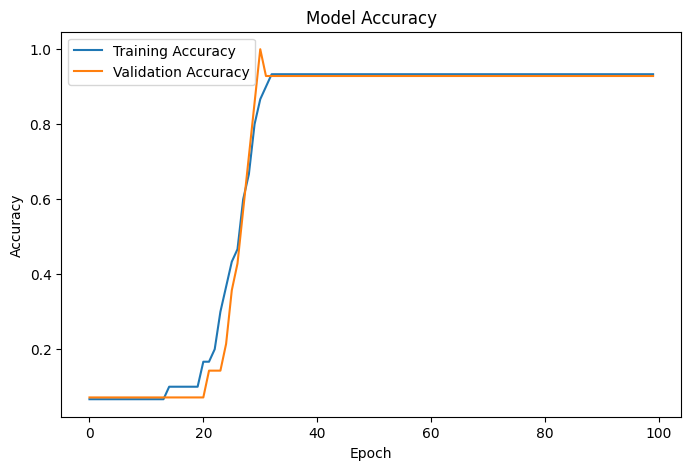

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_acetic_acid.history['accuracy'], label='Training Accuracy')
plt.plot(history_acetic_acid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

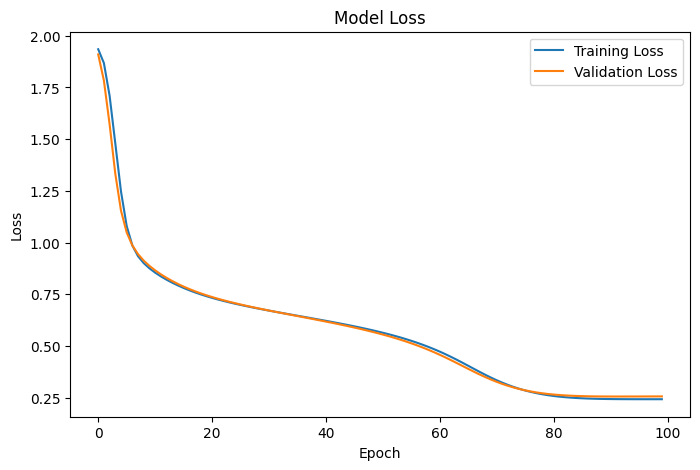

In [ ]:
# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history_acetic_acid.history['loss'], label='Training Loss')
plt.plot(history_acetic_acid.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_acetic_acid, y_pred_acetic_acid_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()